# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [ ]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [ ]:
df = pd.read_csv("obesity_cleaned.csv",index_col=0)

In [ ]:
df.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24570 non-null  object
 1   Year         24570 non-null  int64 
 2   Obesity (%)  24570 non-null  object
 3   Sex          24570 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.8+ KB


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [ ]:
df['Year']=df['Year'].astype(int)

In [ ]:
df.shape

(24570, 4)

In [ ]:
df['Obesity']=df['Obesity (%)'].str.split(' ').str[0]

In [ ]:
df=df[df['Obesity']!='No']

In [ ]:
df['Obesity']=df['Obesity'].dropna()

In [ ]:
df.drop(['Obesity (%)'],axis=1,inplace=True)

In [ ]:
df.shape

(24066, 4)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [ ]:
df_2015=df[df['Year']==2015]
weights=[]
for c in df_2015['Obesity']:
  weights.append(float(c))
print(sum(weights)/len(weights))

19.4628272251309


In [ ]:
del df_2015['Year']
del df_2015['Country']

In [ ]:
df_man=df_2015[df_2015['Sex']=='Male']
df_woman=df_2015[df_2015['Sex']=='Female']

In [ ]:
df_man['Obesity']=df_man['Obesity'].astype(float)
df_man['Obesity'].mean()

<ipython-input-15-ef5630e7e436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_man['Obesity']=df_man['Obesity'].astype(float)


15.98062827225131

In [ ]:
df_woman['Obesity']=df_woman['Obesity'].astype(float)
df_woman['Obesity'].mean()

<ipython-input-16-961caab2e3d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woman['Obesity']=df_woman['Obesity'].astype(float)


22.899476439790583

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [ ]:
df_1975=df[df['Year']==1975]
df_2016=df[df['Year']==2016]
df_aux_1975=df_1975[df_1975['Sex']=='Both sexes']
df_aux_2016=df_2016[df_2016['Sex']=='Both sexes']

In [ ]:
df_aux_1975.head(
)

,Country,Year,Sex,Obesity
0,Afghanistan,1975,Both sexes,0.5
126,Albania,1975,Both sexes,6.5
252,Algeria,1975,Both sexes,6.9
378,Andorra,1975,Both sexes,12.9
504,Angola,1975,Both sexes,0.8


In [ ]:
list_2016_names=[]
list_1975_names=[]
list_2016_obesities=[]
list_1975_obesities=[]

In [ ]:
df_aux_1975['Obesity']=df_aux_1975['Obesity'].astype(float)
df_aux_2016['Obesity']=df_aux_2016['Obesity'].astype(float)

<ipython-input-20-91193eb77117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux_1975['Obesity']=df_aux_1975['Obesity'].astype(float)
<ipython-input-20-91193eb77117>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux_2016['Obesity']=df_aux_2016['Obesity'].astype(float)


In [ ]:
for idx,row in df_aux_1975.iterrows():
  list_1975_obesities.append(float(row['Obesity']))
  list_1975_names.append((row['Country']))
for idx,row in df_aux_2016.iterrows():
  list_2016_obesities.append(float(row['Obesity']))
  list_2016_names.append((row['Country']))

In [ ]:
c=0
nations_diff=[]
nations_diff2=[]
for c in range(0,len(list_1975_obesities)):
  print(list_1975_names[c],list_1975_obesities[c]-list_2016_obesities[c])
  nations_diff.append(float(list_1975_obesities[c]-list_2016_obesities[c]))

Afghanistan -5.0
Albania -15.2
Algeria -20.5
Andorra -12.700000000000001
Angola -7.3999999999999995
Antigua and Barbuda -13.299999999999999
Argentina -17.1
Armenia -12.899999999999999
Australia -18.5
Austria -12.900000000000002
Azerbaijan -13.499999999999998
Bahamas -19.6
Bahrain -15.600000000000001
Bangladesh -3.4
Barbados -15.400000000000002
Belarus -14.6
Belgium -11.600000000000001
Belize -15.3
Benin -8.5
Bhutan -6.0
Bolivia (Plurinational State of) -15.399999999999999
Bosnia and Herzegovina -11.999999999999998
Botswana -16.099999999999998
Brazil -16.900000000000002
Brunei Darussalam -11.5
Bulgaria -14.9
Burkina Faso -5.199999999999999
Burundi -4.800000000000001
Cabo Verde -10.700000000000001
Cambodia -3.6
Cameroon -10.1
Canada -19.599999999999998
Central African Republic -6.3
Chad -5.3999999999999995
Chile -16.8
China -5.7
Colombia -15.700000000000001
Comoros -6.6
Congo -8.1
Cook Islands -27.9
Costa Rica -20.5
Croatia -15.2
Cuba -16.8
Cyprus -16.3
Czechia -12.2
Côte d'Ivoire -8.9
D

In [ ]:
sorted(nations_diff)
#Maiores: Tuvalu, Niue, Kirib, Tonga e Cook Islands
#Menores: Vietnã, Cingapura, Japão, Bangladesh e Timor Leste

[-33.7,
 -31.1,
 -30.1,
 -28.300000000000004,
 -27.9,
 -27.099999999999998,
 -26.999999999999996,
 -26.9,
 -25.9,
 -24.599999999999998,
 -24.300000000000004,
 -23.5,
 -23.2,
 -22.2,
 -21.9,
 -21.8,
 -21.299999999999997,
 -20.9,
 -20.7,
 -20.5,
 -20.5,
 -20.0,
 -19.9,
 -19.6,
 -19.6,
 -19.6,
 -19.599999999999998,
 -19.5,
 -19.4,
 -19.4,
 -19.3,
 -19.3,
 -19.3,
 -19.299999999999997,
 -19.0,
 -18.9,
 -18.9,
 -18.8,
 -18.5,
 -18.4,
 -18.3,
 -18.0,
 -18.0,
 -17.799999999999997,
 -17.7,
 -17.200000000000003,
 -17.1,
 -17.099999999999998,
 -16.900000000000002,
 -16.8,
 -16.8,
 -16.7,
 -16.7,
 -16.5,
 -16.5,
 -16.5,
 -16.3,
 -16.3,
 -16.1,
 -16.1,
 -16.099999999999998,
 -16.0,
 -15.8,
 -15.700000000000001,
 -15.700000000000001,
 -15.600000000000001,
 -15.400000000000002,
 -15.4,
 -15.4,
 -15.399999999999999,
 -15.3,
 -15.299999999999999,
 -15.2,
 -15.2,
 -15.2,
 -15.1,
 -15.099999999999998,
 -14.9,
 -14.899999999999999,
 -14.899999999999999,
 -14.8,
 -14.700000000000001,
 -14.6,
 -14.6,
 -14.5

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [ ]:
df_2015=df[df['Year']==2015]

In [ ]:
df_2015=df_2015[df_2015['Sex']=='Both sexes']

In [ ]:
df_2015['Obesity']=df_2015['Obesity'].astype(float)

In [ ]:
obesities=[]
countries=[]
for c in df_2015['Obesity']:
  obesities.append(c)
for c in df_2015['Country']:
  countries.append(c)

In [ ]:
top5=sorted(obesities)[-3:]

In [ ]:
top5

[54.8, 55.4, 60.7]

In [ ]:
top5_countries=[]
for c in top5:
  top5_countries.append(countries[obesities.index(c)])

In [ ]:
top5_countries

['Palau', 'Cook Islands', 'Nauru']

In [ ]:
top5=sorted(obesities)[:3]

In [ ]:
top5

[2.0, 3.4, 3.6]

In [ ]:
top5_countries=[]
for c in top5:
  if c not in top5_countries:
   top5_countries.append(countries[obesities.index(c)])

In [ ]:
top5_countries # menos obesidade

['Viet Nam', 'Bangladesh', 'Timor-Leste']

- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [ ]:
df_brasil=df[df['Country']=='Brazil']
man=[]
woman=[]
for idx,row in df_brasil.iterrows():
  if row['Sex']=='Male':
    man.append(float(row['Obesity']))
  elif row['Sex']=='Female':
    woman.append(float(row['Obesity']))
print(f'Média dos homens: {sum(man)/len(man)}')
print(f'Média das mulheres: {sum(woman)/len(woman)}')
man_avg=sum(man)/len(man)
woman_avg=sum(woman)/len(woman)
print(f'Diferença: {woman_avg-man_avg}')

Média dos homens: 9.671428571428573
Média das mulheres: 15.849999999999998
Diferença: 6.178571428571425


- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [ ]:
list_1975=[]
list_2016=[]

df_2016_both_sexes=df_2016[df_2016['Sex']=='Both sexes']
df_1975_both_sexes=df_1975[df_1975['Sex']=='Both sexes']

df_2016_both_sexes['Obesity']=df_2016_both_sexes['Obesity'].astype(float)
df_1975_both_sexes['Obesity']=df_1975_both_sexes['Obesity'].astype(float)


for c in df_2016_both_sexes['Obesity']:
  list_2016.append(c)
for c in df_1975_both_sexes['Obesity']:
  list_1975.append(c)

<ipython-input-331-c1057c038754>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016_both_sexes['Obesity']=df_2016_both_sexes['Obesity'].astype(float)
<ipython-input-331-c1057c038754>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1975_both_sexes['Obesity']=df_1975_both_sexes['Obesity'].astype(float)


In [ ]:
avg_1975=sum(list_1975)/len(list_1975)
avg_2016=sum(list_2016)/len(list_2016)
avg_both=[float(avg_1975),float(avg_2016)]

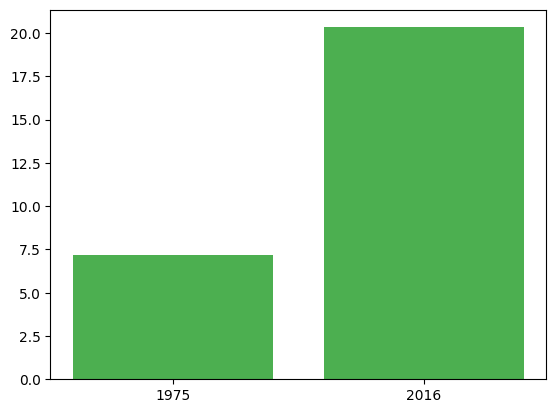

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['1975','2016'])
y = np.array([avg_1975,avg_2016])

plt.bar(x,y,color = "#4CAF50")
plt.show()
